In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ingeniería de características
### Exploración de datos

In [149]:
dataset = pd.read_csv("data/dataset_pishing.csv")

In [150]:
dataset.head()

,url,status
0,http://www.crestonwood.com/router.php,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,phishing
2,https://support-appleld.com.secureupdate.duila...,phishing
3,http://rgipt.ac.in,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate


In [151]:
dataset.describe()

,url,status
count,11430,11430
unique,11429,2
top,http://e710z0ear.du.r.appspot.com/c:/users/use...,legitimate
freq,2,5715


In [152]:
dataset["status"].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

### Derivación de características

1. ¿Qué ventajas tiene el análisis de una URL contra el análisis de otros datos, cómo el tiempo de vida del dominio, o las características de la página Web?
   1. Las ventajas de este tipo de análisis son principalmente en cuanto a la rapidez y eficiencia, ya que las URL son datos que se pueden obtener de manera rápida y sencilla, además de que son datos que se pueden obtener de manera masiva, lo que permite tener un dataset con una gran cantidad de datos para entrenar un modelo. Por otro lado, el análisis de otras características como el tiempo de vida del dominio o las características de la página Web, son datos que se pueden obtener de manera más complicada y que no se pueden obtener de manera masiva, lo que limita la cantidad de datos que se pueden obtener para entrenar un modelo.
2. ¿Qué características de una URL son más prometedoras para la detección de phishing?
   1. Entre las características más importantes se pueden mencionar: la longitud de la URL, la presencia de caracteres especiales, la cantidad de subdominios, palabras clave en la URL, la presencia de HTTPS, la presencia de un certificado SSL, entre muchas otras posibles características que podrían delatar a un sitio de phishing.
3. En base a la respuesta anterior escriba al menos quince funciones basadas en los artículos, para derivar características que un modelo pueda utilizar y añada dichas características al dataset original. Incluya dentro de las quince funciones, la entropía de Shanon y relativa.

In [153]:
from collections import Counter
from scipy.stats import entropy

In [154]:
def shannon_entropy(url: str) -> float:
    """Calcula la entropía de Shannon de una cadena dada."""
    counts = Counter(url)
    probs = [freq / len(url) for freq in counts.values()]
    return -sum(p * np.log2(p) for p in probs)

In [155]:
def relative_entropy(url: str) -> float:
    """Calcula la entropía relativa de una URL con base en la distribución uniforme."""
    counts = Counter(url)
    probs = np.array([freq / len(url) for freq in counts.values()])
    uniform_probs = np.ones(len(probs)) / len(probs)
    return entropy(probs, uniform_probs, base=2)


In [156]:
def url_length(url):
    """Longitud total de la URL"""
    return len(url)

In [157]:
from urllib.parse import urlparse
def domain_length(url):
    """Longitud del dominio"""
    parsed_url = urlparse(url)
    return len(parsed_url.netloc)

In [158]:
import re 
def count_special_chars(url):
    """Cantidad de caracteres especiales en la URL"""
    return len(re.findall(r"[@_-]", url))

In [159]:
def count_digits(url):
    """Cantidad de números en la URL"""
    return sum(c.isdigit() for c in url)

In [160]:
def count_subdomains(url):
    """Número de subdominios en la URL"""
    parsed_url = urlparse(url)
    return parsed_url.netloc.count('.')

In [161]:
def contains_ip_address(url):
    """Verifica si la URL contiene una dirección IP en lugar de un dominio"""
    contains = bool(re.match(r'^(?:\d{1,3}\.){3}\d{1,3}', urlparse(url).netloc))

    # True -> 1, False -> 0
    return int(contains)

In [162]:
def count_hyphens(url):
    """Cantidad de guiones en la URL"""
    return url.count('-')

In [163]:
def count_question_mark(url):
    """Cantidad de signos de interrogación en la URL"""
    return url.count('?')

In [164]:
def count_double_slash(url):
    """Cantidad de doble slash en la URL"""
    return url.count('//')

In [165]:
def contains_suspicious_words(url):
    """Verifica si la URL contiene palabras clave sospechosas"""
    suspicious_words = ['secure', 'account', 'update', 'login', 'banking', 'verify', 'free', 'password']
    return sum(word in url.lower() for word in suspicious_words)

In [166]:
def count_top_level_domain(url):
    """Número de dominios de nivel superior en la URL"""
    tlds = ['.com', '.net', '.org', '.info', '.biz', '.gov', '.edu']
    return sum(url.endswith(tld) for tld in tlds)

In [167]:
def count_https(url):
    """Verifica si la URL usa HTTPS (segura) o HTTP (insegura)"""
    return 1 if urlparse(url).scheme == 'https' else 0

In [168]:
def count_repeated_chars(url):
    """Cuenta la cantidad de caracteres repetidos consecutivamente en la URL"""
    return sum(1 for i in range(len(url) - 1) if url[i] == url[i + 1])

In [169]:
dataset_features = dataset.copy()

dataset_features['shannon_entropy'] = dataset_features['url'].apply(shannon_entropy)
dataset_features['relative_entropy'] = dataset_features['url'].apply(relative_entropy)
dataset_features['url_length'] = dataset_features['url'].apply(url_length)
dataset_features['domain_length'] = dataset_features['url'].apply(domain_length)
dataset_features['special_chars'] = dataset_features['url'].apply(count_special_chars)
dataset_features['digits'] = dataset_features['url'].apply(count_digits)
dataset_features['subdomains'] = dataset_features['url'].apply(count_subdomains)
dataset_features['ip_address'] = dataset_features['url'].apply(contains_ip_address)
dataset_features['hyphens'] = dataset_features['url'].apply(count_hyphens)
dataset_features['question_mark'] = dataset_features['url'].apply(count_question_mark)
dataset_features['double_slash'] = dataset_features['url'].apply(count_double_slash)
dataset_features['suspicious_words'] = dataset_features['url'].apply(contains_suspicious_words)
dataset_features['top_level_domain'] = dataset_features['url'].apply(count_top_level_domain)
dataset_features['https'] = dataset_features['url'].apply(count_https)
dataset_features['repeated_chars'] = dataset_features['url'].apply(count_repeated_chars)

dataset_features.head()

,url,status,shannon_entropy,relative_entropy,url_length,domain_length,special_chars,digits,subdomains,ip_address,hyphens,question_mark,double_slash,suspicious_words,top_level_domain,https,repeated_chars
0,http://www.crestonwood.com/router.php,legitimate,3.787043,0.212957,37,19,0,0,2,0,0,0,1,0,0,0,5
1,http://shadetreetechnology.com/V4/validation/a...,phishing,4.419864,0.438117,77,23,0,17,1,0,0,0,1,0,0,0,5
2,https://support-appleld.com.secureupdate.duila...,phishing,4.753412,0.290982,126,50,3,19,4,0,1,1,1,2,0,1,4
3,http://rgipt.ac.in,legitimate,3.461320,0.123642,18,11,0,0,2,0,0,0,1,0,0,0,2
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,4.097662,0.224266,55,15,2,0,2,0,2,0,1,0,0,0,4


### Preprocesamiento

In [170]:
dataset_features = dataset_features.drop(columns=['url'])

In [171]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
# Legitimo = 1, Phishing = 0
status_encoded = encoder.fit_transform(dataset_features[["status"]]).toarray()

dataset_features["status"] = status_encoded

In [172]:
dataset_features.head()

,status,shannon_entropy,relative_entropy,url_length,domain_length,special_chars,digits,subdomains,ip_address,hyphens,question_mark,double_slash,suspicious_words,top_level_domain,https,repeated_chars
0,1.0,3.787043,0.212957,37,19,0,0,2,0,0,0,1,0,0,0,5
1,0.0,4.419864,0.438117,77,23,0,17,1,0,0,0,1,0,0,0,5
2,0.0,4.753412,0.290982,126,50,3,19,4,0,1,1,1,2,0,1,4
3,1.0,3.461320,0.123642,18,11,0,0,2,0,0,0,1,0,0,0,2
4,1.0,4.097662,0.224266,55,15,2,0,2,0,2,0,1,0,0,0,4


In [173]:
dataset_features.dtypes

status              float64
shannon_entropy     float64
relative_entropy    float64
url_length            int64
domain_length         int64
special_chars         int64
digits                int64
subdomains            int64
ip_address            int64
hyphens               int64
question_mark         int64
double_slash          int64
suspicious_words      int64
top_level_domain      int64
https                 int64
repeated_chars        int64
dtype: object

In [174]:
dataset_features.isna().sum()

status              0
shannon_entropy     0
relative_entropy    0
url_length          0
domain_length       0
special_chars       0
digits              0
subdomains          0
ip_address          0
hyphens             0
question_mark       0
double_slash        0
suspicious_words    0
top_level_domain    0
https               0
repeated_chars      0
dtype: int64

In [175]:
dataset_features.shape

(11430, 16)

### Selección de características

#### Eliminación de columnas con varianza baja

In [176]:
from sklearn.feature_selection import VarianceThreshold

# Eliminar características con varianza cero
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(dataset_features.select_dtypes(include=[np.number]))
dataset_features = dataset_features.loc[:, constant_filter.get_support()]

dataset_features

,status,shannon_entropy,relative_entropy,url_length,domain_length,special_chars,digits,subdomains,ip_address,hyphens,question_mark,double_slash,suspicious_words,top_level_domain,https,repeated_chars
0,1.0,3.787043,0.212957,37,19,0,0,2,0,0,0,1,0,0,0,5
1,0.0,4.419864,0.438117,77,23,0,17,1,0,0,0,1,0,0,0,5
2,0.0,4.753412,0.290982,126,50,3,19,4,0,1,1,1,2,0,1,4
3,1.0,3.461320,0.123642,18,11,0,0,2,0,0,0,1,0,0,0,2
4,1.0,4.097662,0.224266,55,15,2,0,2,0,2,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,1.0,4.119088,0.273230,45,17,0,0,2,0,0,0,1,0,0,0,5
11426,0.0,4.938590,0.346813,84,18,1,2,2,0,0,1,1,1,1,0,4
11427,1.0,4.987577,0.369975,105,16,7,15,2,0,6,1,1,0,0,1,6
11428,1.0,4.214132,0.178185,38,30,0,0,2,0,0,0,1,0,0,0,4


#### Correlación de columnas con la variable objetivo

In [177]:
# 2. Calcular la correlación con la variable objetivo 'status'
numeric_df = dataset_features.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
correlation_target = correlation_matrix["status"].abs().sort_values(ascending=False)
print("\nCorrelación con 'status':\n", correlation_target)


Correlación con 'status':
 status              1.000000
shannon_entropy     0.336562
suspicious_words    0.297465
question_mark       0.294319
url_length          0.248482
digits              0.240425
domain_length       0.238516
relative_entropy    0.229560
https               0.114669
subdomains          0.102622
hyphens             0.100107
ip_address          0.092515
top_level_domain    0.084470
repeated_chars      0.062190
double_slash        0.061499
special_chars       0.060224
Name: status, dtype: float64


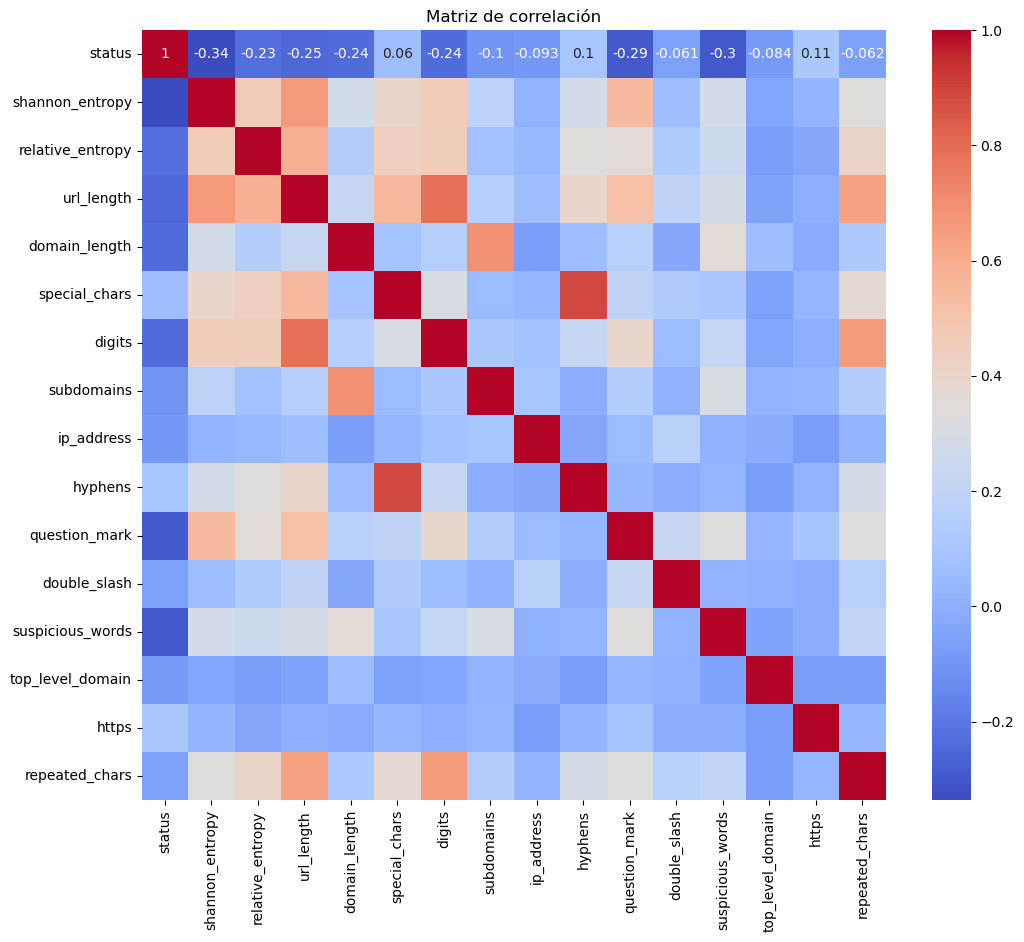

In [178]:
#visualizar matriz de correlacion 
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


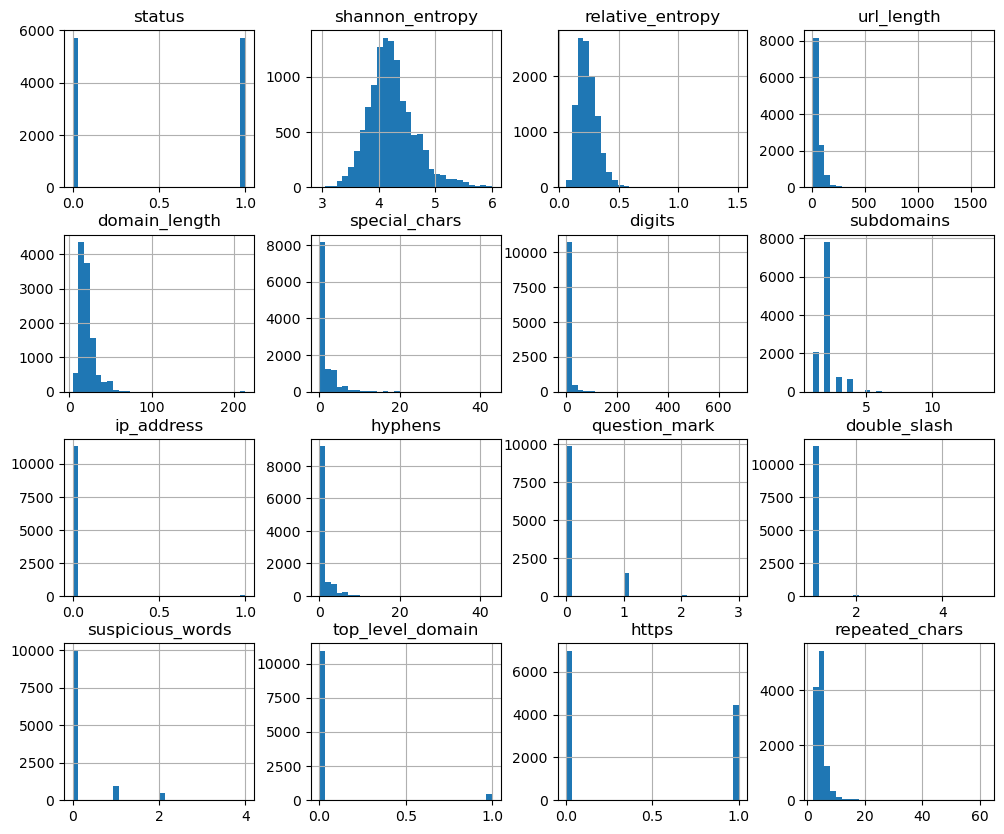

In [179]:
dataset_features.hist(figsize=(12, 10), bins=30)
plt.show()


#### Elección de características con Random Forest

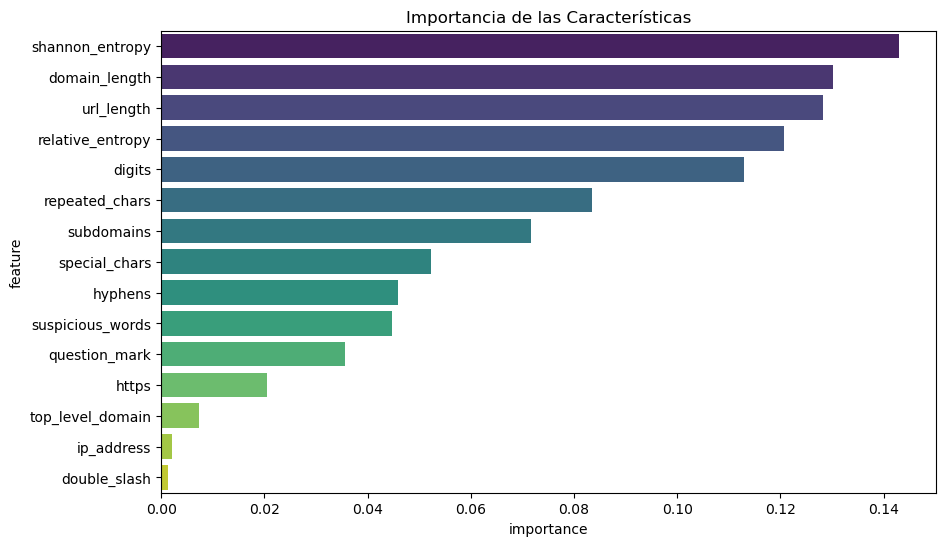

In [180]:
from sklearn.ensemble import RandomForestClassifier

X = dataset_features.drop(columns=['status'])
y = dataset_features['status']

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Crear un dataframe con la importancia de características
importances = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
importances = importances.sort_values(by='importance', ascending=False)

# Visualizar la importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importances, palette='viridis')
plt.title("Importancia de las Características")
plt.show()


In [181]:
dataset_features.drop(columns=['ip_address', 'double_slash', 'top_level_domain'], inplace=True)

In [182]:
dataset_features.head()

,status,shannon_entropy,relative_entropy,url_length,domain_length,special_chars,digits,subdomains,hyphens,question_mark,suspicious_words,https,repeated_chars
0,1.0,3.787043,0.212957,37,19,0,0,2,0,0,0,0,5
1,0.0,4.419864,0.438117,77,23,0,17,1,0,0,0,0,5
2,0.0,4.753412,0.290982,126,50,3,19,4,1,1,2,1,4
3,1.0,3.461320,0.123642,18,11,0,0,2,0,0,0,0,2
4,1.0,4.097662,0.224266,55,15,2,0,2,2,0,0,0,4


## Parte 2 - Implementación

In [183]:
from sklearn.model_selection import train_test_split

X = dataset_features.drop("status", axis=1)
y = dataset_features["status"]

# 55% entrenamiento, 15% validación, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

print(f"Entremaniento: {X_train.shape}")
print(f"Validación: {X_val.shape}")
print(f"Test: {X_test.shape}")

Entremaniento: (6800, 12)
Validación: (1201, 12)
Test: (3429, 12)
